In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv(r'C:\Users\a_gal\Desktop\DataAnalytics\w5\d1\lab-eda-univariate\amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
df_cat_best=pd.crosstab(df['category'], df['isBestSeller'])
df_cat_best

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [3]:
df_catbest_pct=pd.crosstab(df['category'], df['isBestSeller'], normalize = 'index')
df_best=df_catbest_pct.sort_values(by = True, ascending = False)
print("5 most probable:")
for n in range (5):
    cat_best = df_best.index[n]
    pct_best = df_best[True].iloc[n]
    print(f"{cat_best}: {pct_best: .2%}")

5 most probable:
Grocery:  5.81%
Smart Home Security & Lighting:  5.77%
Health & Personal Care:  5.77%
Mobile Phone Accessories:  4.25%
Power & Hand Tools:  3.53%


5 most probable:
Grocery:  5.81%
Smart Home Security & Lighting:  5.77%
Health & Personal Care:  5.77%
Mobile Phone Accessories:  4.25%
Power & Hand Tools:  3.53%

In [4]:
from scipy.stats import chi2_contingency
df_catbest=pd.crosstab(df['category'], df['isBestSeller'])

chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(df_catbest)

chi2_statistic, chi2_p_value

(np.float64(36540.20270061387), np.float64(0.0))

P-value is 0, which mean that the 2 populations are very dependent one in the other.

In [5]:
from scipy.stats.contingency import association
association(df_catbest, method='cramer')

0.1222829439760564

Cramer V 0.12 means a weak association

In [6]:
# target_categories = ['Grocery', 'Smart Home Security & Lighting']
# df_groscat_best=df[df['category'].isin(target_categories)]

# temp = pd.crosstab( df[df['category'].isin(target_categories)]['isBestSeller'], df[df['category'].isin(target_categories)]['category'])
# display(temp)
# statistic, p_value, dof, expected_frequencies = chi2_contingency(temp)
# pd.DataFrame(expected_frequencies, columns = ['Grocery', 'Smart Home Security & Lighting'], index = ['False', 'True'])
# print(statistic, p_value)
# #df_groscat_best_cross=pd.crosstab(df_groscat_best['category'], df_groscat_best['isBestSeller'])
# #df_groscat_best[
# # df_handtoolscat_best_cross=pd.crosstab(df_handtoolscat_best['category'], df_handtoolscat_best['isBestSeller'])
# #chi2_contingency(df_groscat_best)
# #association(df_groscat_best_cross, method='cramer')

<Axes: xlabel='category'>

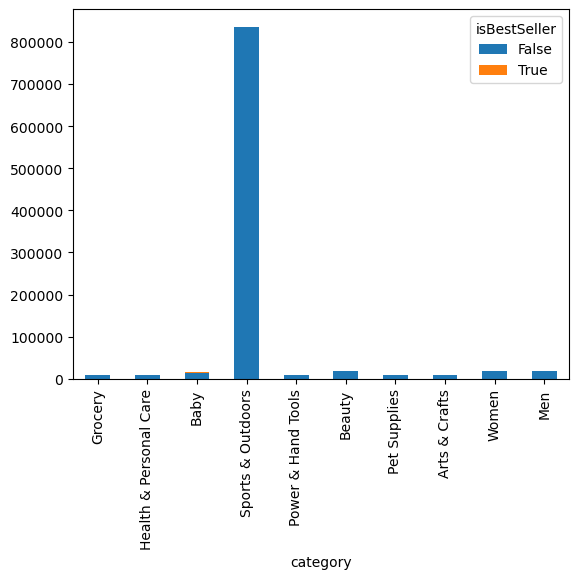

In [7]:
df_top10 = df_catbest.sort_values(by=True, ascending=False).head(10)
df_top10.plot(kind="bar", stacked=True)

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_cleaned = df_cleaned.reset_index(drop = True)

df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2115958,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2115959,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2115960,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2115961,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Text(0.5, 1.0, 'Top 20 categories')

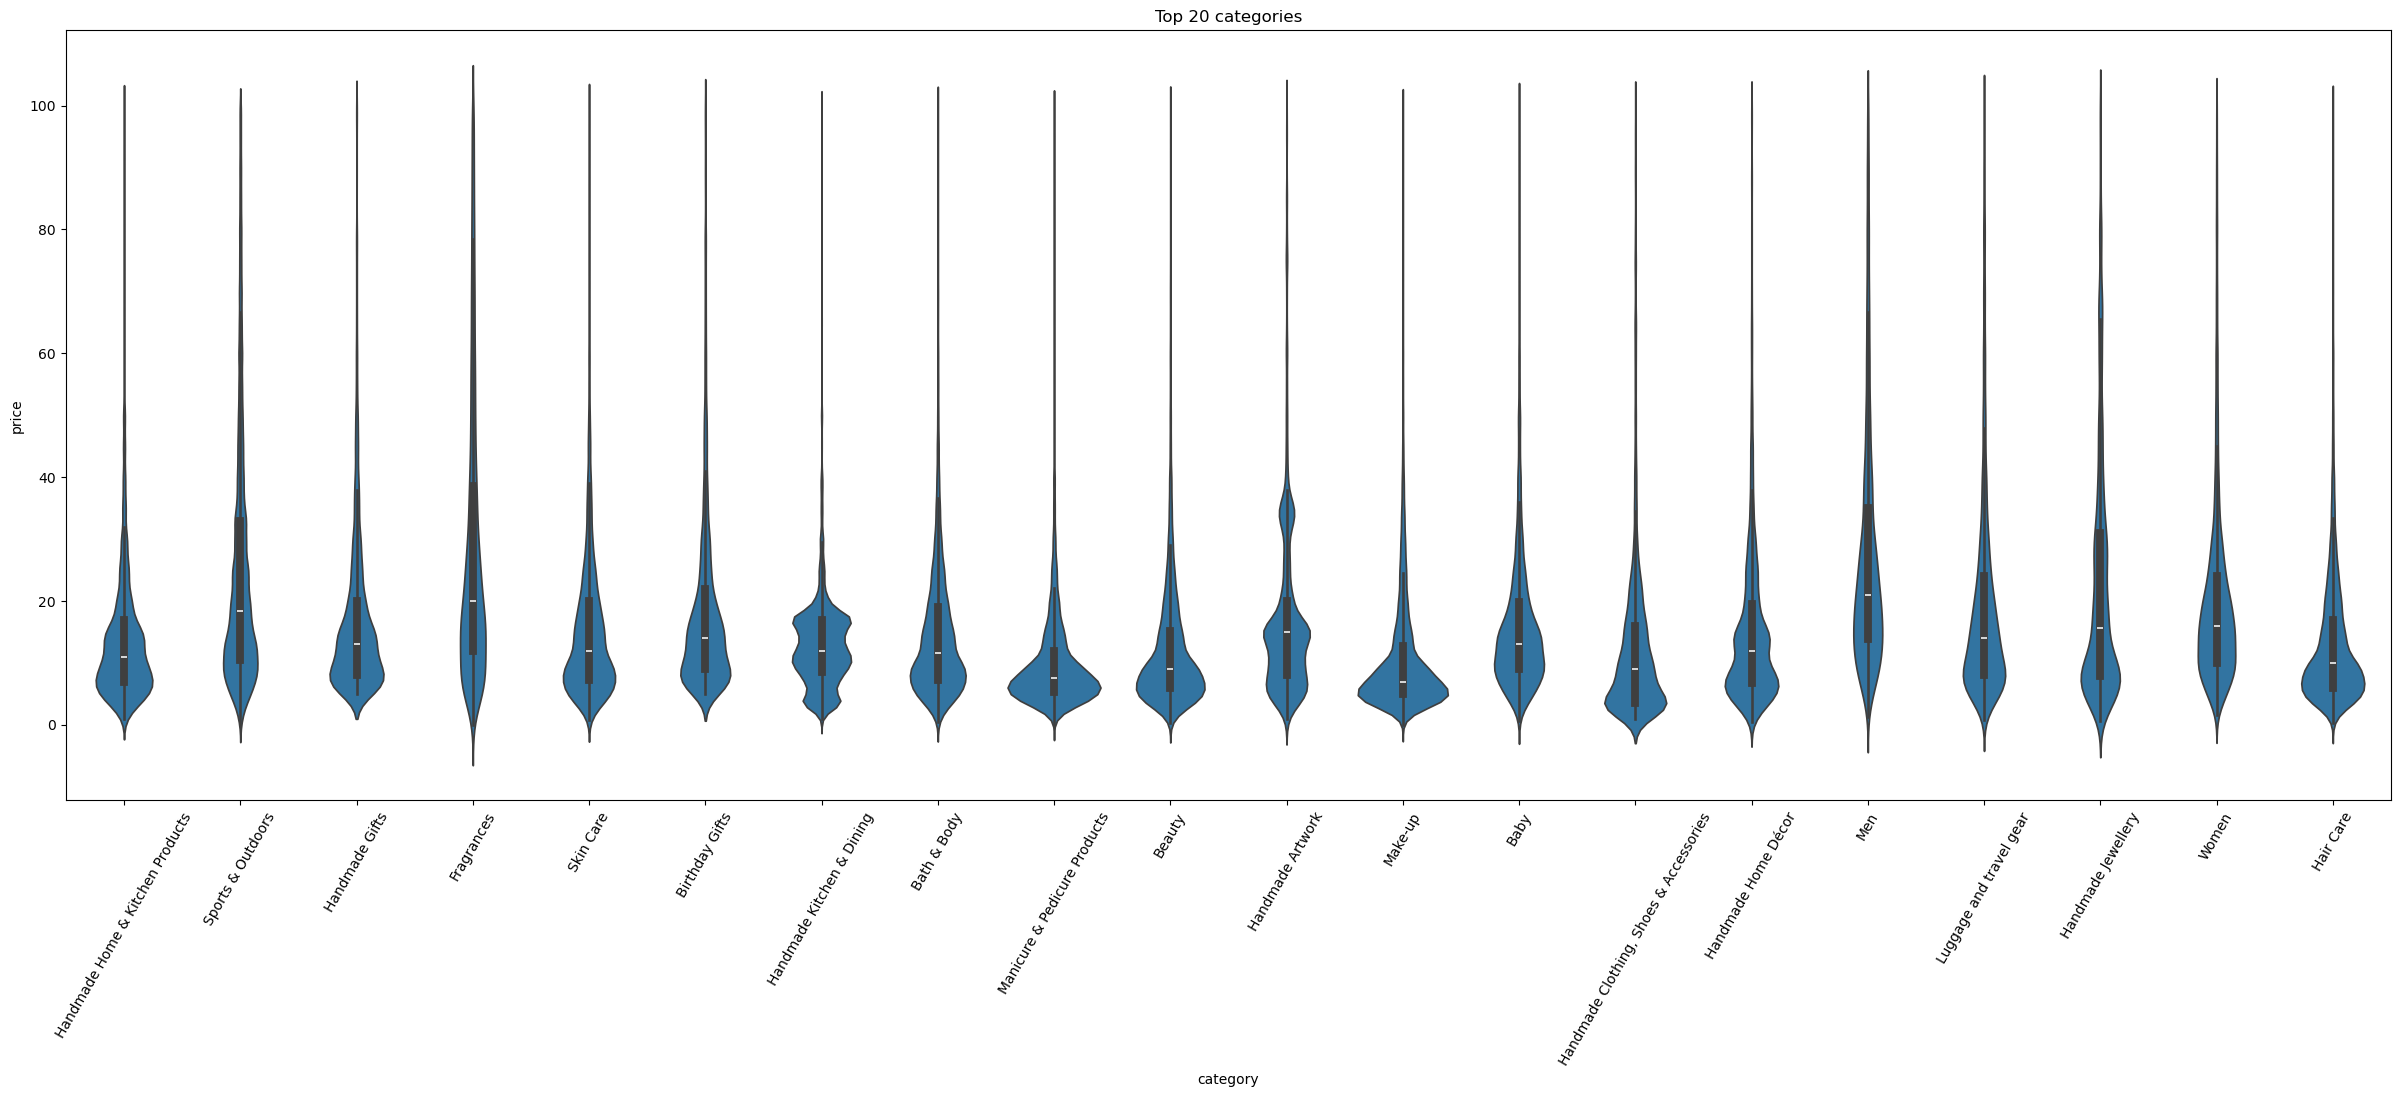

In [25]:
filter_top20counts = df_cleaned['category'].value_counts().head(20).index
df_top20 = df_cleaned [df_cleaned['category'].isin(filter_top20counts)]
# df_top20['category'].nunique()
plt.figure(figsize=(30,10))
sns.violinplot( data=df_top20, x='category', y='price')
plt.xticks(rotation=60)
plt.title('Top 20 categories')

In [29]:
df_cleaned.groupby('category')[['price']].median().sort_values(by='price', ascending=False)

,price
category,
Desktop PCs,74.00
Boxing Shoes,69.79
Tablets,69.00
Graphics Cards,68.54
Motherboards,67.92
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


Desktop PCs has a higher median price

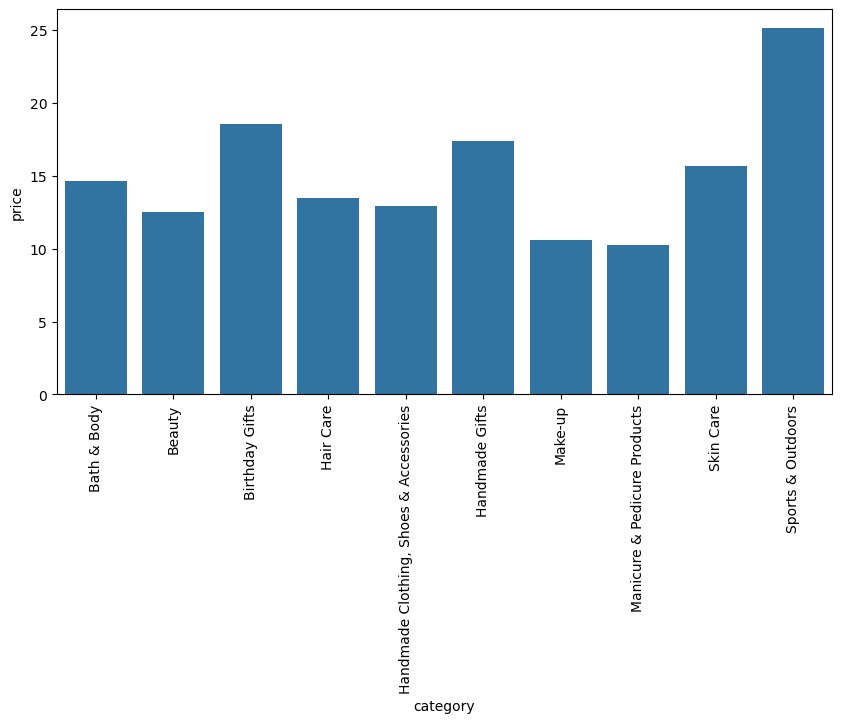

In [43]:
top10_filter = df_cleaned['category'].value_counts().head(10).index
df_top10 = df_cleaned[df_cleaned['category'].isin(top10_filter)].reset_index()
df_top10_av = df_top10.groupby('category')[['price']].mean()

plt.figure(figsize=(10,5))
sns.barplot(data=df_top10_av, x='category', y='price')

plt.xticks(rotation=90)
plt.show()

In [46]:
df_cleaned.groupby('category')[['price']].mean().sort_values(by='price', ascending=False)

,price
category,
Motherboards,68.772432
Boxing Shoes,67.417803
Desktop PCs,66.915562
Tablets,66.552971
Graphics Cards,65.103509
...,...
Bedding Accessories,8.835220
Adapters,8.750197
Signs & Plaques,8.210513


the category Motherboards has the highest average price of 68.772432

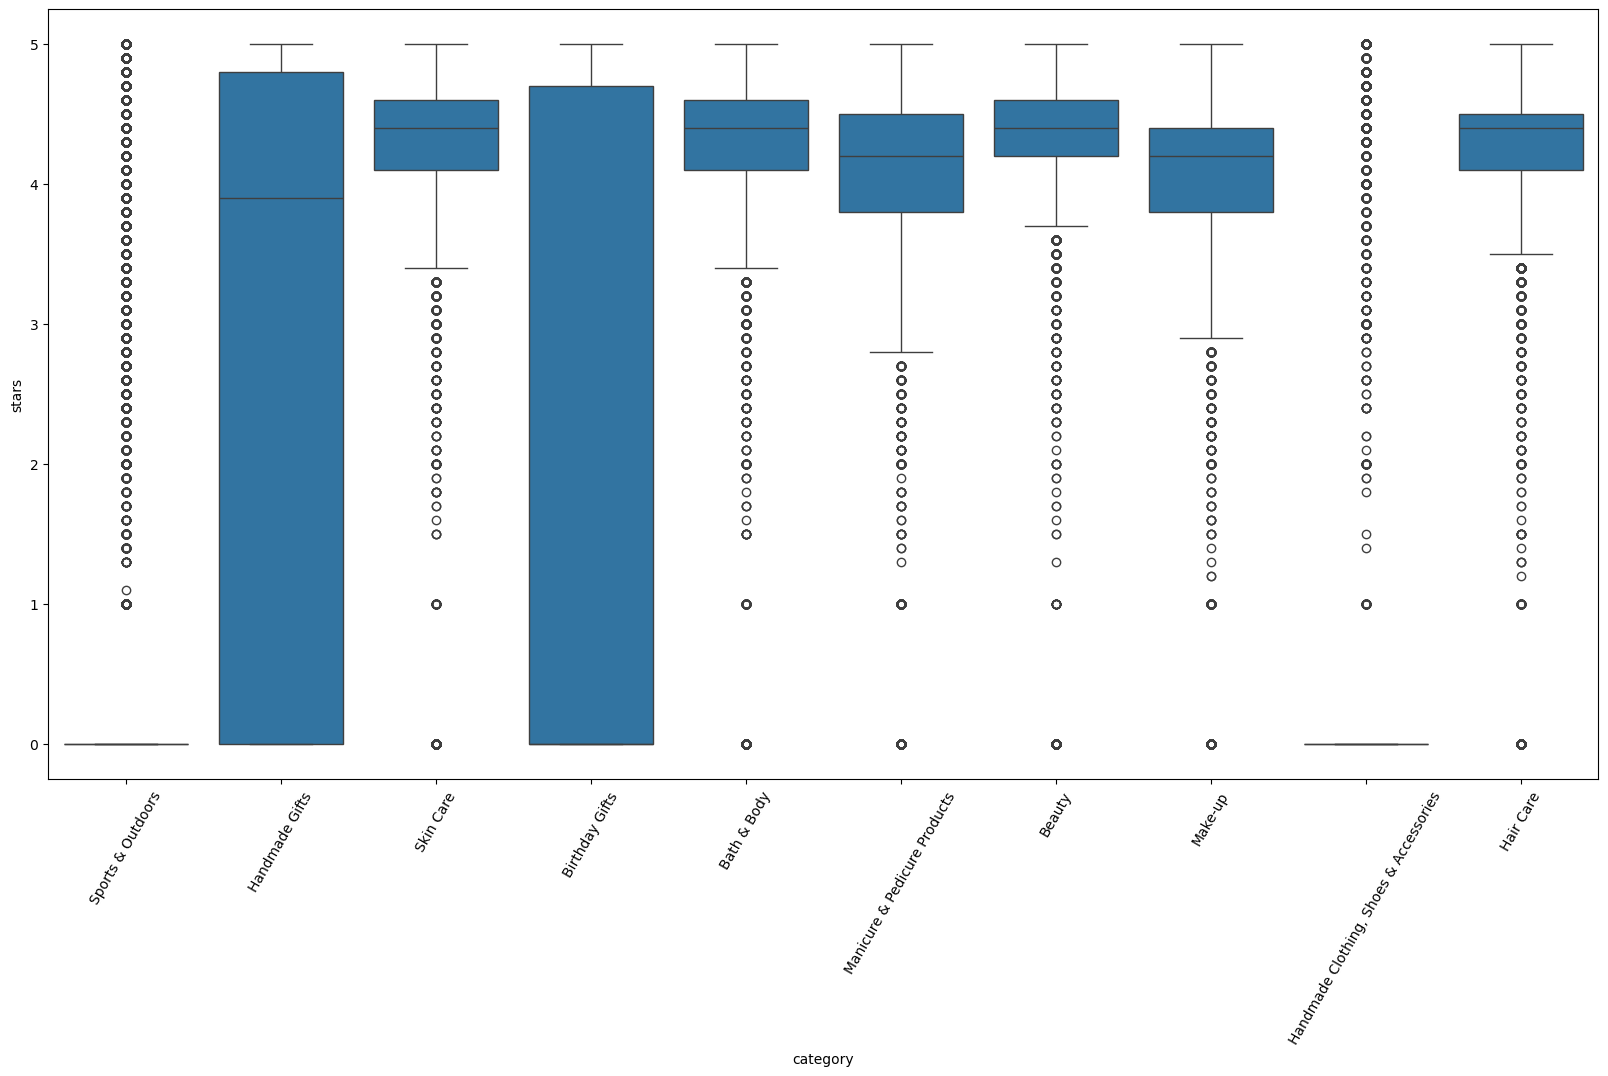

In [52]:
top_10filter = df_cleaned['category'].value_counts().head(10).index
df_top10 = df_cleaned[df_cleaned['category'].isin(top_10filter)]
df_top10

plt.figure(figsize = (20,10))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.xticks(rotation=60)
plt.show()

In [ ]:
df_cleaned.groupby('category')[['stars']].median().sort_values(by='stars', ascending=False)

Computer Memory	is the best rated with a median of 4.7

In [ ]:
df_cleaned.crosstab

In [55]:
correlation = df_cleaned['price'].corr(df_cleaned['stars'])
correlation

np.float64(-0.0776729987818137)

There's is no significance between price and rating.
Due to the negative value of Pearson's coeffiecient, we could eventually think that higher prices are affecting negatively on ratings. Still, the value is very close to 0 so the most reasonable conclusion is no affectance.

<Axes: xlabel='price', ylabel='stars'>

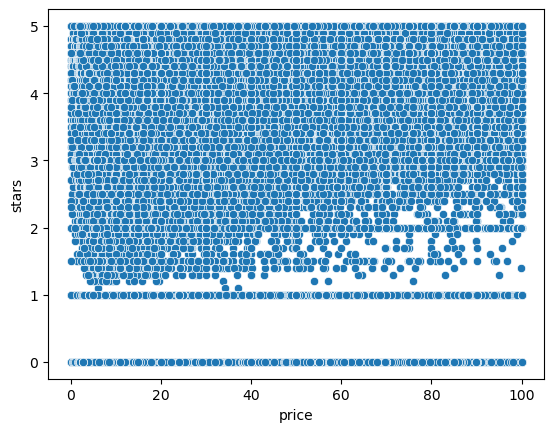

In [57]:
sns.scatterplot(data=df_cleaned, x='price', y='stars')
plt

No patterns are observable in the scatterplot. There's is no correlation.

In [63]:
num_data = df_cleaned[['price', 'stars', 'reviews']]
num_data_corr= num_data.corr()
num_data_corr

,price,stars,reviews
price,1.000000,-0.077673,-0.008498
stars,-0.077673,1.000000,0.083920
reviews,-0.008498,0.083920,1.000000


<Axes: >

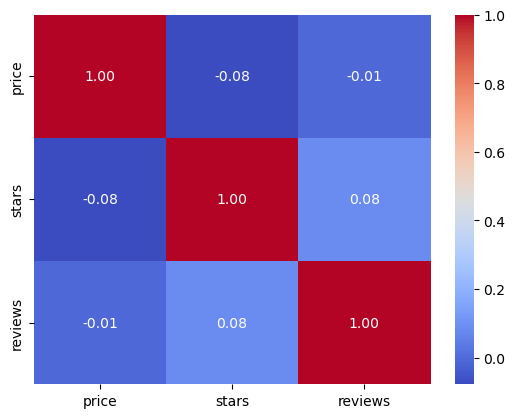

In [61]:
sns.heatmap(num_data_corr, annot=True, cmap='coolwarm', fmt='.2f')

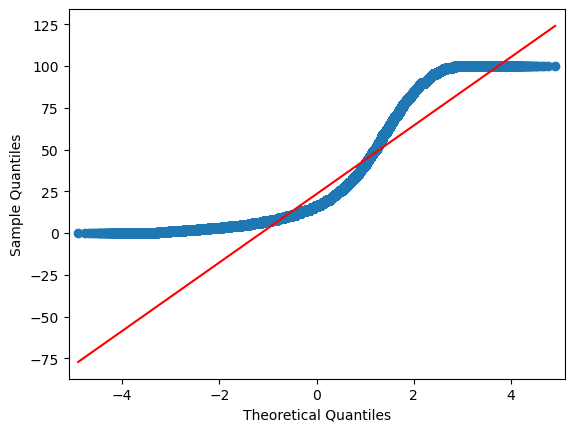

In [64]:
import statsmodels.api as sm

sm.qqplot(df_cleaned['price'], line='s');

There are no correlation between numerical columns, this is: price, stars and reviews.
The variable price doesn't follow a normal distribution